In [17]:
import data_structure as ds
from data_structure import Gender
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import statsmodels.stats.power as smp
import scipy.stats as stats
import pandas as pd
import seaborn as sns

In [18]:
# df = ds.search_all()
df = ds.get_db('GPT')
model_mask = df['round_'] == 4
df = df[model_mask]

df['gender_str'] = df['gender'].apply(lambda x: x.name)

In [19]:
m_mask = df['gender'] == Gender.Male
f_mask = df['gender'] == Gender.Female

df_male, df_female = df[m_mask], df[f_mask]

In [20]:
deserved_group_df = pd.concat(
                    [df_male.value_counts('deserved_salary').sort_index(),
                      df_female.value_counts('deserved_salary').sort_index()],
                        axis=1).reset_index()
deserved_group_df.replace(np.nan, 0, inplace=True)
deserved_group_df = deserved_group_df.apply(lambda x: x.astype(int), axis=1)
deserved_group_df.columns = ['salary',	'male', 'female']

current_group_df = pd.concat(
                    [df_male.value_counts('current_salary').sort_index(),
                     df_female.value_counts('current_salary').sort_index()],
                        axis=1).reset_index()
current_group_df.replace(np.nan, 0, inplace=True)
current_group_df = current_group_df.apply(lambda x: x.astype(int), axis=1)
current_group_df.columns = ['salary',	'male', 'female']

display(deserved_group_df)
display(current_group_df)

,salary,male,female
0,75,4,3
1,80,10,14
2,85,39,55
3,90,31,16
4,95,11,6
5,100,2,0
6,110,2,0
7,115,1,0
8,78,0,1
9,82,0,2


,salary,male,female
0,50,1,0
1,55,5,5
2,56,1,1
3,60,19,20
4,60,1,0
5,64,1,0
6,65,30,38
7,68,1,2
8,70,18,15
9,72,2,1


In [21]:
observed_deserved = deserved_group_df[['male', 'female']].to_numpy()

observed_current = current_group_df[['male', 'female']].to_numpy()

chi2_stat_deserved, p_val_deserved, dof_deserved, expected_deserved = stats.chi2_contingency(observed_deserved)
print(f"Deserved Salary Chi-square Test:\nChi2 Stat: {chi2_stat_deserved}, P-value: {p_val_deserved}, Degrees of Freedom: {dof_deserved}")

chi2_stat_current, p_val_current, dof_current, expected_current = stats.chi2_contingency(observed_current)
print(f"Current Salary Chi-square Test:\nChi2 Stat: {chi2_stat_current}, P-value: {p_val_current}, Degrees of Freedom: {dof_current}")

Deserved Salary Chi-square Test:
Chi2 Stat: 19.78622485658781, P-value: 0.048360041311934464, Degrees of Freedom: 11
Current Salary Chi-square Test:
Chi2 Stat: 22.495957273929836, P-value: 0.12788734119010217, Degrees of Freedom: 16


In [22]:
# Calculating the residuals
residuals = (observed_deserved - expected_deserved) / np.sqrt(expected_deserved)
print("Residuals:\n", residuals)

Residuals:
 [[ 0.25721463 -0.25851043]
 [-0.59326906  0.59625784]
 [-1.19836327  1.2044004 ]
 [ 1.51895997 -1.52661221]
 [ 0.84073255 -0.844968  ]
 [ 0.99248432 -0.99748427]
 [ 0.99248432 -0.99748427]
 [ 0.70179239 -0.70532789]
 [-0.70888121  0.71245242]
 [-1.00250941  1.00755987]
 [-0.70888121  0.71245242]
 [-0.70888121  0.71245242]]


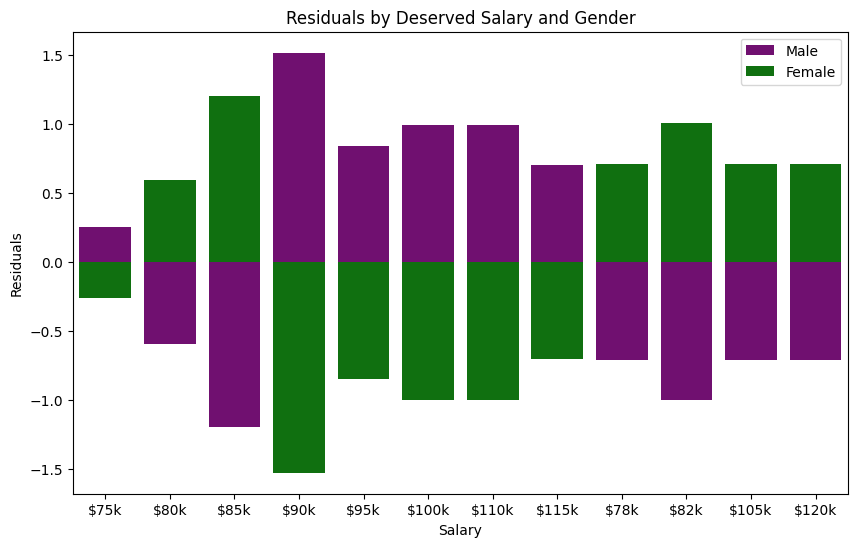

In [23]:
import seaborn as sns

ticks = [
    f'${salary}k' for salary in
    deserved_group_df['salary'].to_numpy()
    ]
male_residuals = residuals[:, 0]
female_residuals = residuals[:, 1]
plt.figure(figsize=(10, 6))
sns.barplot(x=ticks, y=male_residuals, color='purple', label='Male')
sns.barplot(x=ticks, y=female_residuals, color='green', label='Female')
plt.xlabel('Salary')
plt.ylabel('Residuals')
plt.title('Residuals by Deserved Salary and Gender')
plt.legend()
plt.show()

In [24]:
total_men = deserved_group_df['male'].sum()
total_women = deserved_group_df['female'].sum()
proportions_men = [count / total_men for count in deserved_group_df['male']]
proportions_women = [count / total_women for count in deserved_group_df['female']]

print("Proportions of Men in Each Salary Category:", proportions_men)
print("Proportions of Women in Each Salary Category:", proportions_women)

Proportions of Men in Each Salary Category: [np.float64(0.04), np.float64(0.1), np.float64(0.39), np.float64(0.31), np.float64(0.11), np.float64(0.02), np.float64(0.02), np.float64(0.01), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0)]
Proportions of Women in Each Salary Category: [np.float64(0.030303030303030304), np.float64(0.1414141414141414), np.float64(0.5555555555555556), np.float64(0.16161616161616163), np.float64(0.06060606060606061), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.010101010101010102), np.float64(0.020202020202020204), np.float64(0.010101010101010102), np.float64(0.010101010101010102)]


In [25]:
deserved_group_df

,salary,male,female
0,75,4,3
1,80,10,14
2,85,39,55
3,90,31,16
4,95,11,6
5,100,2,0
6,110,2,0
7,115,1,0
8,78,0,1
9,82,0,2


In [26]:
from statsmodels.stats.proportion import proportions_ztest

nobs = np.array([total_men, total_women])
for count, (index, row) in zip(observed_deserved, deserved_group_df.iterrows()):
    stat, pval = proportions_ztest(count, nobs)
    print(f"\nSalary: {row['salary']}, Z-statistic: {stat}, P-value: {pval}")


Salary: 75, Z-statistic: 0.37126203392684504, P-value: 0.7104423729238919

Salary: 80, Z-statistic: -0.896949831104839, P-value: 0.36974568809588626

Salary: 85, Z-statistic: -2.3389951330815304, P-value: 0.019335685375334786

Salary: 90, Z-statistic: 2.464109560562149, P-value: 0.013735411905296344

Salary: 95, Z-statistic: 1.2464005883943257, P-value: 0.21261736534960873

Salary: 100, Z-statistic: 1.41424945566284, P-value: 0.15728867172809413

Salary: 110, Z-statistic: 1.41424945566284, P-value: 0.15728867172809413

Salary: 115, Z-statistic: 0.9974968671630002, P-value: 0.3185233937032804

Salary: 78, Z-statistic: -1.0075725930939397, P-value: 0.31365969166507723

Salary: 82, Z-statistic: -1.4285348036998384, P-value: 0.15313798445174218

Salary: 105, Z-statistic: -1.0075725930939397, P-value: 0.31365969166507723

Salary: 120, Z-statistic: -1.0075725930939397, P-value: 0.31365969166507723


In [27]:
from statsmodels.stats.power import zt_ind_solve_power
# Parameters
alpha = 0.05   # Significance level
power = 0.80   # Power of the test

for count, (index, row) in zip(observed_deserved, deserved_group_df.iterrows()):
    p1 = count[0]/total_men
    p2 = count[1]/total_women

    effect_size = abs(p1 - p2)

    # Calculate sample size per group
    sample_size = zt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=power, alternative='two-sided')
    print(f"Required sample size for salary group {row['salary']}: {sample_size}")

Required sample size for salary group 75: 166941.58387998844
Required sample size for salary group 80: 9152.490404748223
Required sample size for salary group 85: 572.728887217293
Required sample size for salary group 90: 712.9571095290879
Required sample size for salary group 95: 6434.121792055579
Required sample size for salary group 100: 39244.30254664326
Required sample size for salary group 110: 39244.30254664326
Required sample size for salary group 115: 156977.2101852328
Required sample size for salary group 78: 153853.3637013941
Required sample size for salary group 82: 38463.340926008284
Required sample size for salary group 105: 153853.3637013941
Required sample size for salary group 120: 153853.3637013941


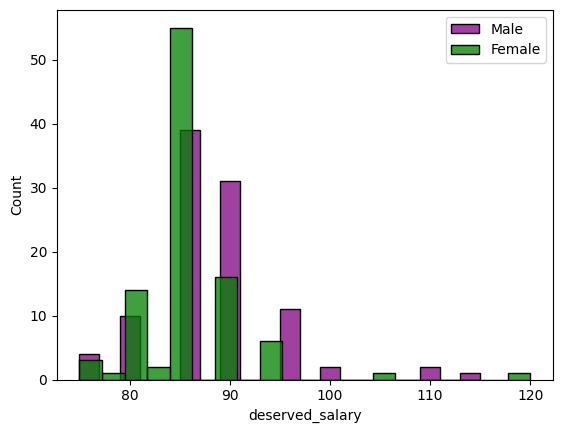

In [44]:
sns.histplot(df_male['deserved_salary'], color='purple', bins=20, label='Male')
sns.histplot(df_female['deserved_salary'], color='green', bins=20, label='Female')
plt.legend()